In [3]:
import sqlite3
import requests
import json
import pandas as pd
import numpy as np

In [4]:
conn = sqlite3.connect('database.sqlite')
c = conn.cursor()

In [5]:
c.execute('''select * from matches where season == 2011''')

matches = pd.DataFrame(c.fetchall())
matches.columns = [i[0] for i in c.description]
matches.head()

,Match_ID,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR
0,1092,D1,2011,2012-03-31,Nurnberg,Bayern Munich,0,1,A
1,1093,D1,2011,2011-12-11,Stuttgart,Bayern Munich,1,2,A
2,1094,D1,2011,2011-08-13,Wolfsburg,Bayern Munich,0,1,A
3,1095,D1,2011,2011-11-27,Mainz,Bayern Munich,3,2,H
4,1096,D1,2011,2012-02-18,Freiburg,Bayern Munich,0,0,D


In [6]:
matches['AwayTeam'].unique()

array(['Bayern Munich', 'Dortmund', 'Dresden', 'Duisburg',
       'Ein Frankfurt', 'FC Koln', 'Freiburg', 'Hamburg',
       'Kaiserslautern', 'Karlsruhe', 'Leverkusen', 'Nurnberg',
       'Schalke 04', 'Stuttgart', 'Werder Bremen', 'Bochum', 'Hannover',
       'Hansa Rostock', 'Hertha', 'Mainz', 'Munich 1860', 'St Pauli',
       'Wolfsburg', "M'gladbach", 'Cottbus', 'Greuther Furth', 'Aachen',
       'Union Berlin', 'Braunschweig', 'Erzgebirge Aue', 'Paderborn',
       'Augsburg', 'Hoffenheim', 'Frankfurt FSV', 'Ingolstadt',
       'Fortuna Dusseldorf', 'Wolves', 'Aston Villa', 'Sunderland',
       'Arsenal', 'Bolton', 'Norwich', 'Chelsea', 'Man United', 'Swansea',
       'Liverpool', 'Blackburn', 'West Brom', 'QPR', 'Newcastle', 'Wigan',
       'Man City', 'Stoke', 'Fulham', 'Tottenham', 'Everton'],
      dtype=object)

In [7]:
len(matches['AwayTeam'].unique())

56

In [8]:
Team_Name = pd.DataFrame(matches['AwayTeam'].unique())

In [9]:
Team_Name.info

<bound method DataFrame.info of                      0
0        Bayern Munich
1             Dortmund
2              Dresden
3             Duisburg
4        Ein Frankfurt
5              FC Koln
6             Freiburg
7              Hamburg
8       Kaiserslautern
9            Karlsruhe
10          Leverkusen
11            Nurnberg
12          Schalke 04
13           Stuttgart
14       Werder Bremen
15              Bochum
16            Hannover
17       Hansa Rostock
18              Hertha
19               Mainz
20         Munich 1860
21            St Pauli
22           Wolfsburg
23          M'gladbach
24             Cottbus
25      Greuther Furth
26              Aachen
27        Union Berlin
28        Braunschweig
29      Erzgebirge Aue
30           Paderborn
31            Augsburg
32          Hoffenheim
33       Frankfurt FSV
34          Ingolstadt
35  Fortuna Dusseldorf
36              Wolves
37         Aston Villa
38          Sunderland
39             Arsenal
40              Bolton
41

In [10]:
win_dummy = pd.get_dummies(matches['FTR'], prefix="Win")

In [11]:
matches.isna().sum()

Match_ID    0
Div         0
Season      0
Date        0
HomeTeam    0
AwayTeam    0
FTHG        0
FTAG        0
FTR         0
dtype: int64

In [12]:
matches.head()

,Match_ID,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR
0,1092,D1,2011,2012-03-31,Nurnberg,Bayern Munich,0,1,A
1,1093,D1,2011,2011-12-11,Stuttgart,Bayern Munich,1,2,A
2,1094,D1,2011,2011-08-13,Wolfsburg,Bayern Munich,0,1,A
3,1095,D1,2011,2011-11-27,Mainz,Bayern Munich,3,2,H
4,1096,D1,2011,2012-02-18,Freiburg,Bayern Munich,0,0,D


Win_A = Win for Away Team: 
Win_D = Game ended in Draw:
Win_H = Home Team Win:

In [13]:
df_matches = pd.concat([matches, win_dummy], axis=1)
df_matches.head()

,Match_ID,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,Win_A,Win_D,Win_H
0,1092,D1,2011,2012-03-31,Nurnberg,Bayern Munich,0,1,A,1,0,0
1,1093,D1,2011,2011-12-11,Stuttgart,Bayern Munich,1,2,A,1,0,0
2,1094,D1,2011,2011-08-13,Wolfsburg,Bayern Munich,0,1,A,1,0,0
3,1095,D1,2011,2011-11-27,Mainz,Bayern Munich,3,2,H,0,0,1
4,1096,D1,2011,2012-02-18,Freiburg,Bayern Munich,0,0,D,0,1,0


In [14]:
df_drop = df_matches.drop(['FTR'], axis=1)

In [15]:
df_drop.head()

,Match_ID,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,Win_A,Win_D,Win_H
0,1092,D1,2011,2012-03-31,Nurnberg,Bayern Munich,0,1,1,0,0
1,1093,D1,2011,2011-12-11,Stuttgart,Bayern Munich,1,2,1,0,0
2,1094,D1,2011,2011-08-13,Wolfsburg,Bayern Munich,0,1,1,0,0
3,1095,D1,2011,2011-11-27,Mainz,Bayern Munich,3,2,0,0,1
4,1096,D1,2011,2012-02-18,Freiburg,Bayern Munich,0,0,0,1,0


In [16]:
c.execute('''select HomeTeam from matches where season == 2011''')

Teams = pd.DataFrame(c.fetchall())
Teams.columns = [i[0] for i in c.description]
Teams.head()

,HomeTeam
0,Nurnberg
1,Stuttgart
2,Wolfsburg
3,Mainz
4,Freiburg


In [17]:
Teams.nunique(0)

HomeTeam    56
dtype: int64

In [18]:
c.execute("""select HomeTeam,
                      sum(FTHG) as numHomeGoal
                      from matches
                      where season == 2011
                      group by HomeTeam
                      
                      """)
Goal = pd.DataFrame(c.fetchall())
Goal.columns = [x[0] for x in c.description]
Goal.head(20)

,HomeTeam,numHomeGoal
0,Aachen,15
1,Arsenal,39
2,Aston Villa,20
3,Augsburg,20
4,Bayern Munich,49
5,Blackburn,26
6,Bochum,23
7,Bolton,23
8,Braunschweig,21
9,Chelsea,41


In [19]:
Goal.shape

(56, 2)

In [20]:
c.execute("""select AwayTeam,
                      sum(FTAG) as numHomeGoalAway
                      from matches
                      where season == 2011
                      group by AwayTeam
                    
                      """)
GoalAway = pd.DataFrame(c.fetchall())
GoalAway.columns = [x[0] for x in c.description]
GoalAway.head()

,AwayTeam,numHomeGoalAway
0,Aachen,15
1,Arsenal,35
2,Aston Villa,17
3,Augsburg,16
4,Bayern Munich,28


In [21]:
GoalAway.shape

(56, 2)

In [22]:
df_Team_Goal = pd.concat([Goal, GoalAway], axis=1)
df_Team_Goal.head()

,HomeTeam,numHomeGoal,AwayTeam,numHomeGoalAway
0,Aachen,15,Aachen,15
1,Arsenal,39,Arsenal,35
2,Aston Villa,20,Aston Villa,17
3,Augsburg,20,Augsburg,16
4,Bayern Munich,49,Bayern Munich,28


In [23]:
# df_Team_Goal_two = df_Team_Goal
df_Team_Goal['TotalGoals'] = df_Team_Goal['numHomeGoal'] + df_Team_Goal['numHomeGoalAway']
# df_Team_Goal.columns = [x[0] for x in c.description]
df_Team_Goal.head()

,HomeTeam,numHomeGoal,AwayTeam,numHomeGoalAway,TotalGoals
0,Aachen,15,Aachen,15,30
1,Arsenal,39,Arsenal,35,74
2,Aston Villa,20,Aston Villa,17,37
3,Augsburg,20,Augsburg,16,36
4,Bayern Munich,49,Bayern Munich,28,77


In [24]:
df_Team_Goal = df_Team_Goal.drop(['AwayTeam'], axis=1)

In [25]:
df_Team_Goal.rename(columns={'HomeTeam': 'Teams'}, inplace=True)

In [26]:
c.execute("""         select AwayTeam, count(FTR) as WinAway
                      from matches
                      where season == 2011 AND FTR == 'A'
                      group by AwayTeam
                    
                      """)
GoalAway = pd.DataFrame(c.fetchall())
GoalAway.columns = [x[0] for x in c.description]
GoalAway.head()

,AwayTeam,WinAway
0,Aachen,2
1,Arsenal,9
2,Aston Villa,3
3,Augsburg,2
4,Bayern Munich,9


In [27]:
c.execute("""         select HomeTeam, count(FTR) as WinHome
                      from matches
                      where season == 2011 AND FTR == 'H'
                      group by HomeTeam
                    
                      """)
GoalHome = pd.DataFrame(c.fetchall())
GoalHome.columns = [x[0] for x in c.description]
GoalHome.head()

,HomeTeam,WinHome
0,Aachen,4
1,Arsenal,12
2,Aston Villa,4
3,Augsburg,6
4,Bayern Munich,14


In [28]:
df_final = pd.concat([GoalHome, GoalAway], axis=1)
df_final.head()

,HomeTeam,WinHome,AwayTeam,WinAway
0,Aachen,4,Aachen,2
1,Arsenal,12,Arsenal,9
2,Aston Villa,4,Aston Villa,3
3,Augsburg,6,Augsburg,2
4,Bayern Munich,14,Bayern Munich,9


In [29]:
df_final.shape

(56, 4)

In [30]:
df_final = df_final.drop(['AwayTeam'], axis=1)

In [31]:
df_final_final = pd.concat([df_Team_Goal, df_final], axis=1)

In [32]:
df_final_final = df_final_final.drop(['HomeTeam'], axis=1)

In [33]:
df_final_final.head()

,Teams,numHomeGoal,numHomeGoalAway,TotalGoals,WinHome,WinAway
0,Aachen,15,15,30,4,2
1,Arsenal,39,35,74,12,9
2,Aston Villa,20,17,37,4,3
3,Augsburg,20,16,36,6,2
4,Bayern Munich,49,28,77,14,9


In [34]:
df_final_final['TotalWins'] = df_final_final['WinHome'] + df_final_final['WinAway']

In [35]:
df_final_final.head()

,Teams,numHomeGoal,numHomeGoalAway,TotalGoals,WinHome,WinAway,TotalWins
0,Aachen,15,15,30,4,2,6
1,Arsenal,39,35,74,12,9,21
2,Aston Villa,20,17,37,4,3,7
3,Augsburg,20,16,36,6,2,8
4,Bayern Munich,49,28,77,14,9,23


In [36]:
c.execute("""         select AwayTeam, count(FTR) as Loss
                      from matches
                      where season == 2011 AND (FTR == 'H')
                      group by AwayTeam
                    
                      """)
lossaway = pd.DataFrame(c.fetchall())
lossaway.columns = [x[0] for x in c.description]
lossaway.head()

,AwayTeam,Loss
0,Aachen,8
1,Arsenal,7
2,Aston Villa,6
3,Augsburg,8
4,Bayern Munich,5


In [37]:
c.execute("""         select HomeTeam, count(FTR) as Losshome
                      from matches
                      where season == 2011 AND (FTR == 'A')
                      group by HomeTeam
                    
                      """)
losshome = pd.DataFrame(c.fetchall())
losshome.columns = [x[0] for x in c.description]
losshome.head()

,HomeTeam,Losshome
0,Aachen,7
1,Arsenal,3
2,Aston Villa,8
3,Augsburg,4
4,Bayern Munich,2


In [38]:
c.execute("""         select AwayTeam, count(FTR) as DrawA
                      from matches
                      where season == 2011 AND (FTR == 'D')
                      group by AwayTeam
                    
                      """)
drawaway = pd.DataFrame(c.fetchall())
drawaway.columns = [x[0] for x in c.description] 
drawaway.head()

,AwayTeam,DrawA
0,Aachen,7
1,Arsenal,3
2,Aston Villa,10
3,Augsburg,7
4,Bayern Munich,3


In [39]:
c.execute("""         select HomeTeam, count(FTR) as DrawH
                      from matches
                      where season == 2011 AND (FTR == 'D')
                      group by HomeTeam
                    
                      """)
drawhome = pd.DataFrame(c.fetchall())
drawhome.columns = [x[0] for x in c.description]
drawhome.head()

,HomeTeam,DrawH
0,Aachen,6
1,Arsenal,4
2,Aston Villa,7
3,Augsburg,7
4,Bayern Munich,1


In [40]:
df_three = pd.concat([lossaway, drawaway, losshome, drawhome], axis=1)
df_three.head()

,AwayTeam,Loss,AwayTeam,DrawA,HomeTeam,Losshome,HomeTeam,DrawH
0,Aachen,8,Aachen,7,Aachen,7.0,Aachen,6
1,Arsenal,7,Arsenal,3,Arsenal,3.0,Arsenal,4
2,Aston Villa,6,Aston Villa,10,Aston Villa,8.0,Aston Villa,7
3,Augsburg,8,Augsburg,7,Augsburg,4.0,Augsburg,7
4,Bayern Munich,5,Bayern Munich,3,Bayern Munich,2.0,Bayern Munich,1


In [41]:
df_four = pd.concat([df_final_final, df_three], axis=1)

In [42]:
df_four.head()

,Teams,numHomeGoal,numHomeGoalAway,TotalGoals,WinHome,WinAway,TotalWins,AwayTeam,Loss,AwayTeam,DrawA,HomeTeam,Losshome,HomeTeam,DrawH
0,Aachen,15,15,30,4,2,6,Aachen,8,Aachen,7,Aachen,7.0,Aachen,6
1,Arsenal,39,35,74,12,9,21,Arsenal,7,Arsenal,3,Arsenal,3.0,Arsenal,4
2,Aston Villa,20,17,37,4,3,7,Aston Villa,6,Aston Villa,10,Aston Villa,8.0,Aston Villa,7
3,Augsburg,20,16,36,6,2,8,Augsburg,8,Augsburg,7,Augsburg,4.0,Augsburg,7
4,Bayern Munich,49,28,77,14,9,23,Bayern Munich,5,Bayern Munich,3,Bayern Munich,2.0,Bayern Munich,1


In [43]:
df_five = df_four.drop(['AwayTeam', 'HomeTeam', ], axis=1).copy()


In [44]:
df_five.head()

,Teams,numHomeGoal,numHomeGoalAway,TotalGoals,WinHome,WinAway,TotalWins,Loss,DrawA,Losshome,DrawH
0,Aachen,15,15,30,4,2,6,8,7,7.0,6
1,Arsenal,39,35,74,12,9,21,7,3,3.0,4
2,Aston Villa,20,17,37,4,3,7,6,10,8.0,7
3,Augsburg,20,16,36,6,2,8,8,7,4.0,7
4,Bayern Munich,49,28,77,14,9,23,5,3,2.0,1


In [46]:
df_five.head()

,Teams,numHomeGoal,numHomeGoalAway,TotalGoals,WinHome,WinAway,TotalWins,Loss,DrawA,Losshome,DrawH
0,Aachen,15,15,30,4,2,6,8,7,7.0,6
1,Arsenal,39,35,74,12,9,21,7,3,3.0,4
2,Aston Villa,20,17,37,4,3,7,6,10,8.0,7
3,Augsburg,20,16,36,6,2,8,8,7,4.0,7
4,Bayern Munich,49,28,77,14,9,23,5,3,2.0,1


In [47]:
df_five['TotalGames'] = df_five['DrawA'] + df_five['Losshome'] + df_five['DrawH'] + df_five['Loss'] + df_five['TotalWins']

In [48]:
df_five.head()

,Teams,numHomeGoal,numHomeGoalAway,TotalGoals,WinHome,WinAway,TotalWins,Loss,DrawA,Losshome,DrawH,TotalGames
0,Aachen,15,15,30,4,2,6,8,7,7.0,6,34.0
1,Arsenal,39,35,74,12,9,21,7,3,3.0,4,38.0
2,Aston Villa,20,17,37,4,3,7,6,10,8.0,7,38.0
3,Augsburg,20,16,36,6,2,8,8,7,4.0,7,34.0
4,Bayern Munich,49,28,77,14,9,23,5,3,2.0,1,34.0


In [49]:
df_six = df_five.drop(['Loss', 'DrawA', 'Losshome', 'DrawH'], axis=1)

In [50]:
df_six.head()

,Teams,numHomeGoal,numHomeGoalAway,TotalGoals,WinHome,WinAway,TotalWins,TotalGames
0,Aachen,15,15,30,4,2,6,34.0
1,Arsenal,39,35,74,12,9,21,38.0
2,Aston Villa,20,17,37,4,3,7,38.0
3,Augsburg,20,16,36,6,2,8,34.0
4,Bayern Munich,49,28,77,14,9,23,34.0


In [58]:
df_six['TotalLoss'] = df_six['TotalGames'] - df_six['TotalWins']

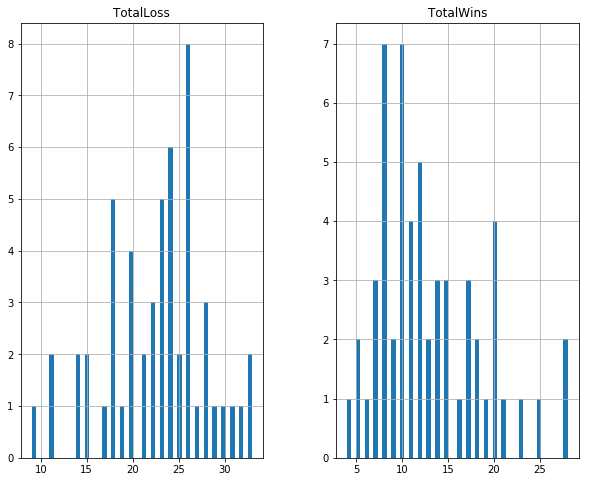

In [66]:
import matplotlib.pyplot as plt

%matplotlib inline

df_six[["TotalWins", "TotalLoss"]].hist(bins=50, figsize  = [10, 8])

plt.show()

In [73]:
df_six.head()

,Teams,numHomeGoal,numHomeGoalAway,TotalGoals,WinHome,WinAway,TotalWins,TotalGames,TotalLoss
0,Aachen,15,15,30,4,2,6,34.0,28.0
1,Arsenal,39,35,74,12,9,21,38.0,17.0
2,Aston Villa,20,17,37,4,3,7,38.0,31.0
3,Augsburg,20,16,36,6,2,8,34.0,26.0
4,Bayern Munich,49,28,77,14,9,23,34.0,11.0


Text(0.5, 0, 'Teams')

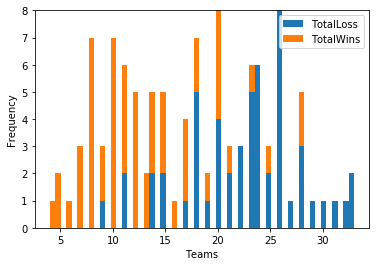

In [81]:
df_six[['TotalLoss','TotalWins']].plot.hist(stacked=True, bins=55)
plt.xlabel('Teams',fontsize=10)
plt.ylable('')